In [23]:
from sys import getsizeof

from multiprocessing import Pool
import numpy as np
from pathlib import Path

from rcoeffs_cy import R_tensor
import matplotlib.pyplot as plt

In [24]:
def compute_R(N: int) -> int:
    """computation protocol. Followed by each worker of the multiprocessing pool
    (one worker per value of tau).

    Parameters
    ----------
    N : int
        max number of particles for each input channel
    """
    R = R_tensor(N, 0.5)
    
    return getsizeof(R)

In [25]:
# single channel, max number of particles
N_array = np.linspace(1, 400, 100, dtype=int)

In [32]:
"""
ACTUAL COMPUTATION (WITH MULTIPROCESSING)
-----------------------------------------
"""
res = []
with Pool(processes=len(N_array)) as pool:
    
    for i in pool.imap_unordered(compute_R, N_array):
        res.append(i)

In [33]:
res.sort()

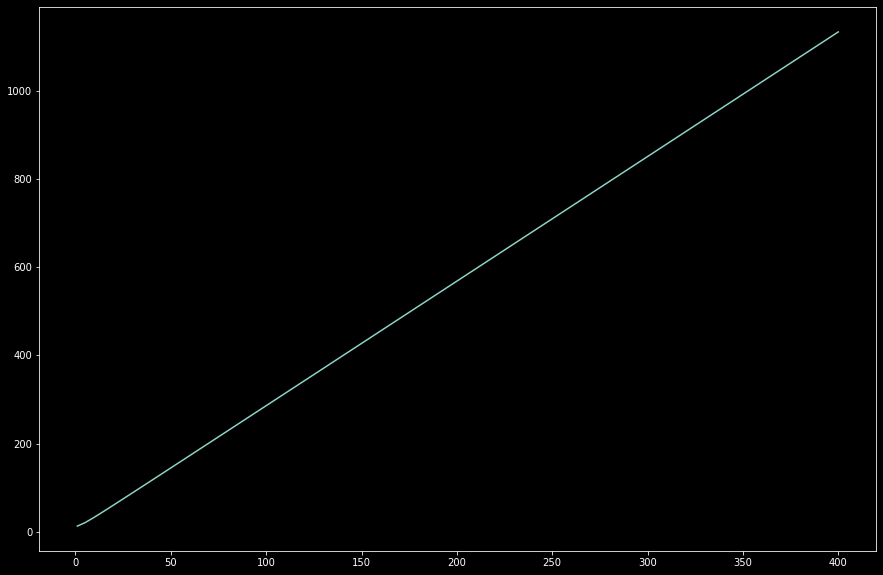

In [36]:
plt.figure(figsize=(15,10))
plt.plot(N_array, np.sqrt(res))